# Body Performance Data Analysis

### Importing and Splitting data

In [17]:
import pandas as pd
import sklearn
from sklearn import model_selection
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn import metrics
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as matplot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import random
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow import keras
import tensorflow as tf
from sklearn.metrics import silhouette_score
import time
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from scipy import linalg
from yellowbrick.cluster import SilhouetteVisualizer

warnings.filterwarnings('ignore')
%matplotlib inline


In [18]:
train_data = pd.read_csv('/content/bodyPerformance.csv')

In [19]:
#np.any(np.isnan(train_data))
train_data.isnull().values.any()


False

In [20]:
train_data.notnull().values.all()


True

In [21]:
train_data.shape

(13393, 12)

In [22]:
train_data.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [23]:
train_data.head(10)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B


In [24]:
train_data.duplicated().sum()

1

In [25]:
print(f'With duplicates:{train_data.shape}')
train_data.drop_duplicates(inplace=True)
print(f'Without duplicates:{train_data.shape}')

With duplicates:(13393, 12)
Without duplicates:(13392, 12)


In [26]:
train_data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000
mean,36.775836,168.560671,67.448686,23.239608,78.797499,130.238120,36.964569,15.208933,39.770385,190.131355
std,13.625886,8.426305,11.949061,7.256829,10.742165,14.709536,10.624959,8.456904,14.276902,39.868988
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


From the above table, we observe that 'sit and bend forward_cm' field has maximum value of 213 and minimum value is negative which is not possible. Hence, we need to remove such values.

In [27]:
# Removing values greater than 45
train_data.sort_values('sit and bend forward_cm', ascending=False).head(10)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
2657,33.0,M,165.6,60.40,17.8,81.0,127.0,38.6,213.0,53.0,244.0,B
3355,45.0,M,164.4,64.40,24.3,96.0,142.0,38.5,185.0,44.0,223.0,A
4203,46.0,M,164.4,63.60,23.4,70.0,115.0,36.0,42.0,42.0,210.0,A
4438,59.0,M,175.4,68.10,21.3,74.0,122.0,36.2,40.0,40.0,174.0,B
8905,52.0,M,166.3,74.30,26.0,79.0,131.0,47.1,40.0,40.0,194.0,B
12066,47.0,M,169.0,78.30,17.3,112.0,181.0,39.2,37.0,37.0,197.0,C
6161,51.0,F,162.2,58.20,25.1,79.0,131.0,27.2,35.2,25.0,134.0,D
3718,24.0,M,170.1,72.68,21.2,78.0,130.0,39.9,35.2,43.0,295.0,C
6306,22.0,F,160.5,50.80,17.0,57.0,107.0,30.2,35.2,46.0,181.0,A
7797,24.0,F,168.3,61.30,24.5,72.0,110.0,30.1,35.2,39.0,182.0,C


In the above table, we can see 'sit and bend forward_cm' field has two values i.e. 213 and 185 which are not possible (outliers). So need to reomve those values.

In [28]:
train_data = train_data[train_data['sit and bend forward_cm'] < 45]
train_data.sort_values('sit and bend forward_cm', ascending=False).head(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
4203,46.0,M,164.4,63.6,23.4,70.0,115.0,36.0,42.0,42.0,210.0,A
8905,52.0,M,166.3,74.3,26.0,79.0,131.0,47.1,40.0,40.0,194.0,B
4438,59.0,M,175.4,68.1,21.3,74.0,122.0,36.2,40.0,40.0,174.0,B
12066,47.0,M,169.0,78.3,17.3,112.0,181.0,39.2,37.0,37.0,197.0,C
7797,24.0,F,168.3,61.3,24.5,72.0,110.0,30.1,35.2,39.0,182.0,C


In [29]:
# Removing negtaive values
train_data[train_data['sit and bend forward_cm'] < 0].head(10)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
33,30.0,M,172.1,79.50,26.7,91.0,148.0,34.7,-2.0,40.0,192.0,D
47,26.0,M,172.1,66.10,24.9,62.0,102.0,19.9,-9.9,44.0,159.0,D
75,22.0,M,171.9,78.46,22.9,64.0,116.0,43.6,-9.3,46.0,219.0,D
139,22.0,M,180.3,91.70,32.1,75.0,134.0,28.6,-6.9,36.0,210.0,D
248,61.0,M,171.6,86.40,28.7,70.0,142.0,35.1,-2.4,12.0,162.0,D
265,23.0,F,161.1,53.00,28.4,72.0,116.0,28.9,-4.4,22.0,143.0,D
286,53.0,F,160.4,59.30,20.3,57.0,102.0,22.5,-5.0,13.0,150.0,D
327,24.0,M,176.1,74.80,24.3,96.0,125.0,35.7,-12.0,1.0,200.0,D
328,27.0,M,170.0,75.90,34.4,82.0,132.0,35.2,-6.6,49.0,202.0,D
342,64.0,M,159.3,56.50,19.8,82.0,154.0,34.2,-1.4,16.0,144.0,D


In the above table, we observe that 'sit and bend forward_cm' field has negative values. So we need to remove the negative values.

In [30]:
train_data = train_data[train_data['sit and bend forward_cm'] >= 0]
train_data.sort_values('sit and bend forward_cm').head(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
486,31.0,F,165.1,55.1,25.7,79.0,114.0,23.7,0.0,27.0,136.0,D
3904,46.0,M,172.0,61.0,20.4,78.0,112.0,36.9,0.0,27.0,130.0,D
6393,21.0,M,173.0,83.1,30.0,80.0,120.0,37.4,0.0,34.0,185.0,D
2503,22.0,M,169.4,57.2,10.7,69.0,119.0,33.9,0.0,65.0,250.0,D
5104,33.0,M,178.8,83.3,21.9,75.0,110.0,47.9,0.0,40.0,225.0,D


In [31]:
train_data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,12748.000000,12748.000000,12748.000000,12748.000000,12748.000000,12748.000000,12748.000000,12748.000000,12748.000000,12748.000000
mean,36.788202,168.397341,67.121713,23.102563,78.756362,130.217752,36.993043,16.265145,40.186931,190.738477
std,13.645802,8.421171,11.778390,7.238529,10.709802,14.711143,10.686917,6.642336,14.181425,39.889308
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,162.200000,57.900000,17.900000,71.000000,120.000000,27.400000,11.800000,31.000000,163.000000
50%,32.000000,169.000000,67.110000,22.600000,79.000000,130.000000,38.000000,16.600000,42.000000,194.000000
75%,48.000000,174.600000,75.000000,27.800000,86.000000,141.000000,45.300000,21.000000,51.000000,222.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,42.000000,80.000000,303.000000


In [32]:
train_data.shape

(12748, 12)

In [33]:
print("Unique \'Class\' Attribute values - Before encoding", train_data['class'].unique())
print("Unique \'Gender\' Attribute values - Before encoding", train_data['gender'].unique())

Unique 'Class' Attribute values - Before encoding ['C' 'A' 'B' 'D']
Unique 'Gender' Attribute values - Before encoding ['M' 'F']


In [34]:
#Encoding to defined values

train_data["class"].replace({'A':3,'B':2,'C':1, 'D':0},inplace=True)
train_data["gender"].replace({'M':0,'F':1},inplace=True)

In [35]:
print("Unique \'Class\' Attribute values - Before encoding", train_data['class'].unique())
print("Unique \'Gender\' Attribute values - Before encoding", train_data['gender'].unique())

Unique 'Class' Attribute values - Before encoding [1 3 2 0]
Unique 'Gender' Attribute values - Before encoding [0 1]


In [36]:
X=train_data.drop(['class'],axis=1)
y=train_data['class']

In [ ]:
X.shape

(12748, 11)

In [ ]:
X_std_scaled = StandardScaler().fit_transform(X)
X_std_scaled = pd.DataFrame(X_std_scaled)


In [ ]:
print('Standard Scaled training data: \n')
X_std_scaled.head(10)

Standard Scaled training data: 



,0,1,2,3,4,5,6,7,8,9,10
0,-0.717333,-0.779205,0.463452,0.689280,-0.249033,0.116126,-0.014802,1.675662,0.321414,1.397169,0.658386
1,-0.863904,-0.779205,-0.403444,-0.961265,-1.022701,-0.164002,-0.286716,-0.055495,0.005248,0.903546,0.959230
2,-0.424191,-0.779205,1.330349,0.923616,-0.414819,1.236639,1.480721,0.730544,-0.642140,0.621476,-0.244147
3,-0.350906,-0.779205,0.724709,0.337775,-0.649683,-0.257378,1.140830,0.412386,-0.160363,0.903546,0.708527
4,-0.644048,-0.779205,0.641582,0.049099,-0.829284,-0.817635,-0.218737,0.608895,1.631245,0.339406,0.658386
5,-0.057764,1.283359,-0.355943,-0.995227,-0.152325,-1.377891,-0.762564,-1.234553,0.712858,-0.929910,-0.946117
6,0.381949,1.283359,-0.462821,-0.290519,1.256857,-0.630883,0.325089,-1.337486,-2.328360,-1.564568,-1.121610
7,-0.277620,-0.779205,0.772210,0.855693,1.906186,0.489630,0.461046,0.833478,-0.596974,0.127853,1.084582
8,1.261375,-0.779205,-0.189689,0.032118,0.621344,0.583006,2.364440,0.318810,0.351525,-0.436287,-1.071469
9,-0.644048,-0.779205,1.971615,1.483987,-1.202303,0.209502,1.752635,1.956390,-0.627085,1.044581,0.558104


In [ ]:
def stratified_split_data(X, y,n_splits=1, test_size=1/6, random_state=42):
  
  sss = StratifiedShuffleSplit(n_splits, test_size=test_size, random_state=random_state)
  for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    return(X_train, X_test,y_train, y_test)

In [ ]:
# Dividing Standard scaled data into training, validation, and testing dataset
X_train_val,X_test,y_train_val,y_test=stratified_split_data(X,y,1,test_size=1/7 )
X_train,X_val,y_train,y_val=stratified_split_data(X_train_val,y_train_val,1,test_size=1/6 )

In [ ]:
print("Standard Scaled Dataset Shape : \n")
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("X_val :",X_val.shape)

Standard Scaled Dataset Shape : 

X_train : (9105, 11)
X_test : (1822, 11)
X_val : (1821, 11)


In [ ]:
# Dividing Standard scaled data into training, validation, and testing dataset
X_train_val_std,X_test_std,y_train_val_std,y_test_std=stratified_split_data(X_std_scaled,y,1,test_size=1/7 )
X_train_std,X_val_std,y_train_std,y_val_std=stratified_split_data(X_train_val_std,y_train_val_std,1,test_size=1/6 )

In [ ]:
print("Standard Scaled Dataset Shape : \n")
print("X_train_std :",X_train_std.shape)
print("X_test_std :",X_test_std.shape)
print("X_val_std :",X_val_std.shape)

Standard Scaled Dataset Shape : 

X_train_std : (9105, 11)
X_test_std : (1822, 11)
X_val_std : (1821, 11)


# Display Data

In [ ]:
#Display Training Dataset
print(f"Training Dataset - Standard Scaler scaled: \n {X_train_std.head(5)} \n", "---------------------------------------------------------------------------")

Training Dataset - Standard Scaler scaled: 
              0         1         2         3         4         5         6   \
6297   1.334660 -0.779205  1.377850  1.093426 -0.760207 -0.817635 -0.150759   
5823   1.847659 -0.779205 -0.130312 -0.859380 -0.539159 -0.257378 -0.490651   
10215 -0.204335 -0.779205  1.722234  2.051149  0.096354  0.956511  1.548700   
3616  -0.863904 -0.779205  1.235347  0.626450 -0.221402  0.583006  0.393068   
9133   1.114804 -0.779205  0.950340  0.507584 -0.677314 -1.191139 -0.966499   

             7         8         9         10  
6297   1.254570  0.336469  0.691993  0.432753  
5823  -0.027422  0.170858 -0.577322 -0.595132  
10215  2.527204 -1.108862 -0.224735  0.708527  
3616  -0.158428  1.390357 -0.295252  0.683456  
9133   0.711829  0.396692  0.903546  0.959230   
 ---------------------------------------------------------------------------


In [ ]:
#Display Validation Dataset
print(f"Validation Dataset - Standard Scaler scaled: \n {X_val_std.head(5)} \n", "---------------------------------------------------------------------------")

Validation Dataset - Standard Scaler scaled: 
             0         1         2         3         4         5         6   \
3448 -1.157046  1.283359 -0.842830 -1.317865  0.041092  0.116126 -0.694586   
6181  0.015522 -0.779205  1.033467  0.753807 -0.580605 -1.284515 -1.306391   
9363  1.334660  1.283359 -1.104087 -0.825418  1.698953 -0.350754 -1.034478   
6265 -0.863904 -0.779205  0.938464  1.017011 -1.105594  0.302878 -0.830543   
6821 -0.424191 -0.779205  0.605956  1.789643 -0.027985 -0.444130 -0.694586   

            7         8         9         10  
3448 -1.159692  1.179579 -0.083699 -0.369499  
6181  0.739902 -0.596974 -0.013182  0.407682  
9363 -1.393632 -0.416307 -2.199226 -1.322172  
6265  1.282643 -0.943251  0.974064  1.510778  
6821  1.104848  0.863413  0.550958  0.482893   
 ---------------------------------------------------------------------------


In [ ]:
#Display Testing Dataset
print(f"Testing Dataset - Standard Scaler scaled: \n {X_test_std.head(5)} \n", "---------------------------------------------------------------------------")

Testing Dataset - Standard Scaler scaled: 
              0         1         2         3         4         5         6   \
5988  -1.157046  1.283359  0.047817 -1.156546 -0.428635 -0.630883 -0.626608   
183   -1.010475 -0.779205 -0.320317 -0.375424  0.013461 -0.817635 -0.490651   
7209   0.015522  1.283359 -0.783454 -1.131074  1.201595  0.769759  0.461046   
4252  -0.497477  1.283359 -1.662226 -1.547107  0.566082 -0.911011 -1.714261   
12206 -1.157046 -0.779205  0.214071  0.388718 -0.166140 -0.724259 -0.694586   

             7         8         9         10  
5988  -0.626308  1.269913 -0.154217 -0.143866  
183    0.066154  1.390357 -0.365770  1.159793  
7209  -1.393632  0.697802 -0.436287 -1.046399  
4252  -1.496565  0.652636 -1.211980 -1.397384  
12206  0.721186  0.697802  1.538204  1.059512   
 ---------------------------------------------------------------------------


# Random Forest before applying PCA

In [ ]:
scores=[]
def display(col=['Dataset type','training acc','validation acc','test acc', 'Time Taken']):
    table = pd.DataFrame(scores,columns=col)
    return table

def perform_random_forest(dataset,X_train, y_train, X_val, y_val, X_test, y_test,min_samples_leaf=1,max_leaf_nodes=None,n_estimators=100, max_depth=None,feature_analysis=False,cm=True):
    
    start = time.time()
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_leaf_nodes=max_leaf_nodes)
    rf_clf.fit(X_train, y_train)
    end = time.time()-start
    print("Accuracy on Testing dataset: \n")
    print(classification_report(y_test, rf_clf.predict(X_test)))

    # Evaluate the training and validation accuracy
    train_acc = rf_clf.score(X_train, y_train)
    val_acc = rf_clf.score(X_val, y_val)
    test_acc = rf_clf.score(X_test, y_test)
    
    print(f'Training accuracy: {train_acc:.4f}')
    print(f'Validation accuracy: {val_acc:.4f}')
    print(f'Testing accuracy: {test_acc:.4f}')
    scores.append([dataset,train_acc,val_acc,test_acc,end])
    
    # Analyze feature importance
    if feature_analysis:
        feature_importance = rf_clf.feature_importances_
        sorted_idx = feature_importance.argsort()[::-1]
        print("Feature Importance Ranking:")
        for idx in sorted_idx:
            print(f'Feature {idx+1}: {feature_importance[idx]:.4f}')
            
            
    # Generate confusion matrix
    if cm:
      y_pred = rf_clf.predict(X_test)
      cm = confusion_matrix(y_test, y_pred)
      print("Confusion Matrix:")
      
      matplot.subplots(figsize=(10, 6))
      sns.heatmap(cm, annot = True, fmt = 'g')
      matplot.xlabel("Predicted")
      matplot.ylabel("Actual")
      matplot.title("Confusion Matrix")
      matplot.show()  
    return train_acc, val_acc   
    #return train_acc   

Accuracy on Testing dataset: 

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       387
           1       0.74      0.68      0.71       479
           2       0.61      0.58      0.59       478
           3       0.71      0.84      0.77       478

    accuracy                           0.72      1822
   macro avg       0.73      0.72      0.72      1822
weighted avg       0.72      0.72      0.72      1822

Training accuracy: 1.0000
Validation accuracy: 0.7232
Testing accuracy: 0.7195
Confusion Matrix:


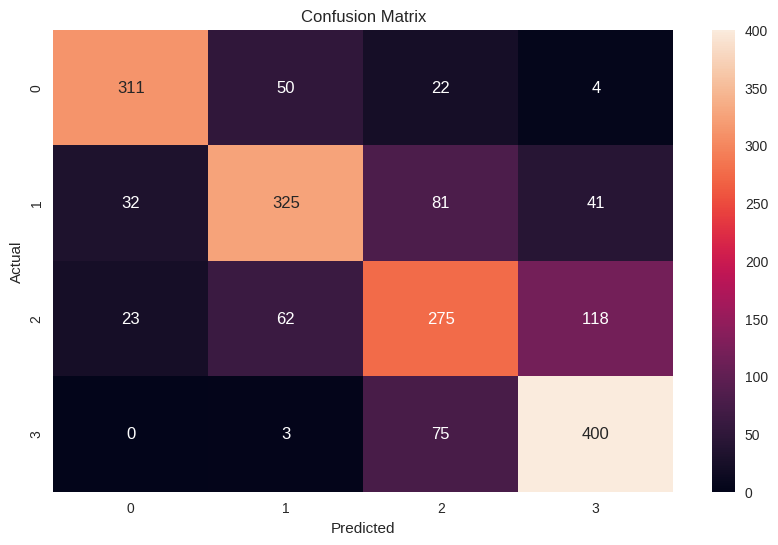

(1.0, 0.7232289950576606)

In [ ]:
perform_random_forest("Random Forest Without PCA",X_train_std, y_train_std, X_val_std, y_val_std, X_test_std, y_test_std,n_estimators=500, max_depth=50)

In [ ]:
print("Random Forest - Without Applying PCA: \n")
display(col=["Dataset Type","Training Accuracy","Validation Accuracy","Testing Accuracy","Time Taken"])

Random Forest - Without Applying PCA: 



,Dataset Type,Training Accuracy,Validation Accuracy,Testing Accuracy,Time Taken
0,Random Forest Without PCA,1.0,0.723229,0.719539,11.650223


## Apply PCA to the training portion of the dataset. How many components do you need to preserve 95% of the variance? 

In [ ]:
def perform_PCA(X, dataset):
  print("Dataset :", dataset)
  pca=PCA()
  pca.fit_transform(X)
  features = range(pca.n_components_)
  plt.bar(features,pca.explained_variance_ratio_,color="black")
  plt.xlabel("PCA features")
  plt.ylabel("variance")
  plt.xticks(features)
  plt.show()
  cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)
  print("Estimated no. of components: ", len(cum_sum_eigenvalues[cum_sum_eigenvalues<0.95]))
  print("\n----------------------------------------------------------------------------------\n")
  return


Dataset : Standard Scaled


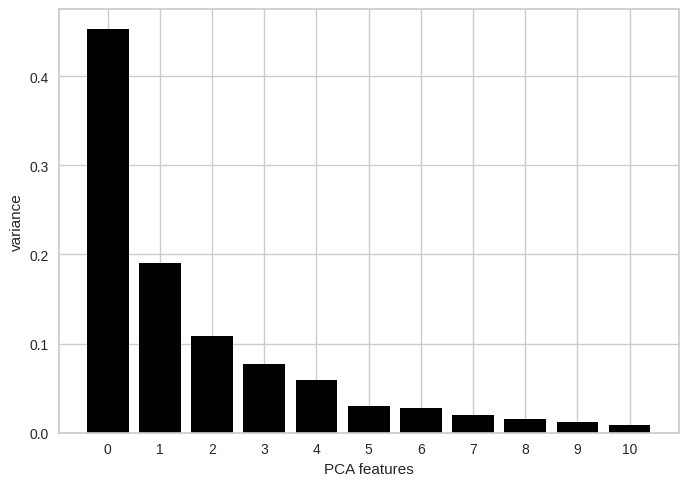

Estimated no. of components:  7

----------------------------------------------------------------------------------



In [ ]:
perform_PCA(X_train_std,'Standard Scaled')

Here We are plotting principal components of all the features. All the components together give 100% of variance.

We are selecting 8 components out of 11 because they contribute 95% of variance.

In [ ]:
def perform_pca_components(dataset,X_train,X_val,X_test,components=1):
  print("Dataset :", dataset)
  pca=PCA(n_components=components)
  X_train_pca=pca.fit_transform(X_train)
  features = range(pca.n_components_)
  plt.bar(features,pca.explained_variance_ratio_,color="black")
  plt.xlabel("PCA features")
  plt.ylabel("variance")
  plt.xticks(features)
  plt.show()

  var_ratio=pca.explained_variance_ratio_
  print("Total no. of components:",components)
  print("Total Variance:",sum(var_ratio)*100)

  X_val_pca=pca.transform(X_val)
  X_test_pca = pca.transform(X_test)
  
  print("\n------------------------------------------------------------------------\n")
  return(X_train_pca,X_val_pca,X_test_pca)

Dataset : Standard Scaled


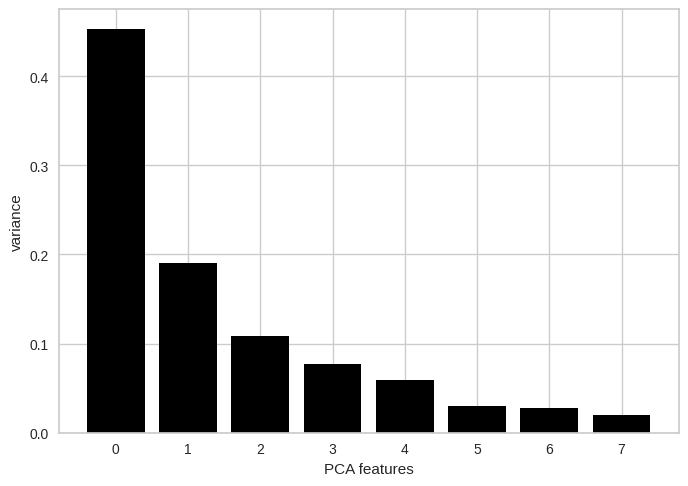

Total no. of components: 8
Total Variance: 96.33028367652294

------------------------------------------------------------------------



In [ ]:
X_train_std_pca, X_val_std_pca,X_test_std_pca= perform_pca_components("Standard Scaled",X_train_std,X_val_std,X_test_std,components=8)

**Ans:**From the above visualization, we can see that, for standard scaled training data, we need to select 8 out 11 components to preserve 95% of variance.

# Random Forest - After Applying PCA

### Train a Random Forest Classifier on the reduced dataset. Was training much faster in HW2? Evaluate the classifier on the test set. How does it compare to the classifier from Homework 2?

Accuracy on Testing dataset: 

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       387
           1       0.58      0.57      0.58       479
           2       0.47      0.48      0.47       478
           3       0.69      0.76      0.73       478

    accuracy                           0.63      1822
   macro avg       0.64      0.63      0.63      1822
weighted avg       0.63      0.63      0.63      1822

Training accuracy: 1.0000
Validation accuracy: 0.6238
Testing accuracy: 0.6273
Confusion Matrix:


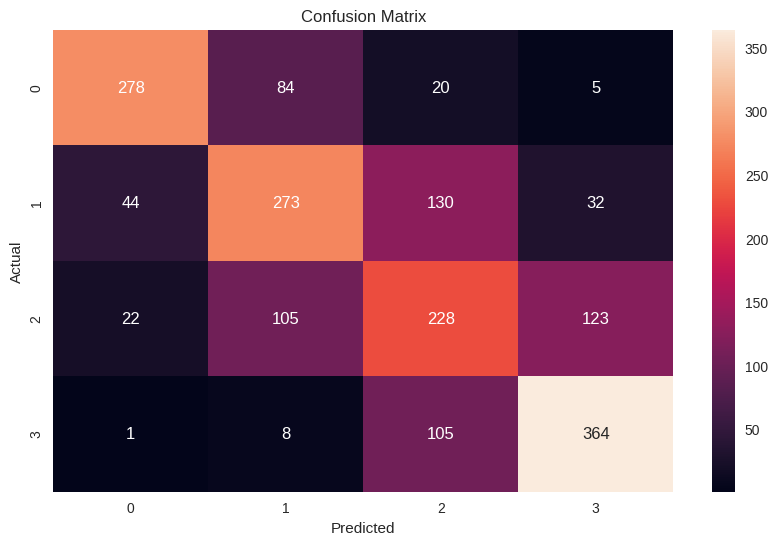

(1.0, 0.6238330587589237)

In [ ]:
# using Standard Scaled dataset
perform_random_forest("Random Forest With PCA",X_train_std_pca, y_train_std, X_val_std_pca, y_val_std, X_test_std_pca, y_test_std)


In [ ]:
print("Random Forest - After Applying PCA: \n")
display(col=["Dataset type","Training Accuracy","Validation Accuracy","Testing Accuracy","Time Taken"])

Random Forest - After Applying PCA: 



,Dataset type,Training Accuracy,Validation Accuracy,Testing Accuracy,Time Taken
0,Random Forest Without PCA,1.0,0.723229,0.719539,11.650223
1,Random Forest With PCA,1.0,0.623833,0.627333,2.647466


**Observation:**

1. Time taken to perform random forest with PCA is less as compared to the Time taken to perform random forest without PCA.
2. Accuracy of the model decreased significantly as earlier it was around 71.9% and now it is 62.7% since random forest already performs feature selection and does not benefit from PCA therefore.

# Plotting Images in Original form and with PCA

### Plot 10 random images in the original form (without PCA) and then plot them after you kept 95% of variance using PCA. 

In [ ]:
#Display data in original form:
print(f"Dataset in Original Form: \n \n")
print(f"Training Dataset - Standard Scaler scaled: \n {X_train_std.head(5)} \n \n", "---------------------------------------------------------------------------")
#Display Validation Dataset
print(f"Validation Dataset - Standard Scaler scaled: \n {X_val_std.head(5)} \n \n", "---------------------------------------------------------------------------")
#Display Testing Dataset
print(f"Testing Dataset - Standard Scaler scaled: \n {X_test_std.head(5)} \n \n", "---------------------------------------------------------------------------")

Dataset in Original Form: 
 

Training Dataset - Standard Scaler scaled: 
              0         1         2         3         4         5         6   \
6297   1.334660 -0.779205  1.377850  1.093426 -0.760207 -0.817635 -0.150759   
5823   1.847659 -0.779205 -0.130312 -0.859380 -0.539159 -0.257378 -0.490651   
10215 -0.204335 -0.779205  1.722234  2.051149  0.096354  0.956511  1.548700   
3616  -0.863904 -0.779205  1.235347  0.626450 -0.221402  0.583006  0.393068   
9133   1.114804 -0.779205  0.950340  0.507584 -0.677314 -1.191139 -0.966499   

             7         8         9         10  
6297   1.254570  0.336469  0.691993  0.432753  
5823  -0.027422  0.170858 -0.577322 -0.595132  
10215  2.527204 -1.108862 -0.224735  0.708527  
3616  -0.158428  1.390357 -0.295252  0.683456  
9133   0.711829  0.396692  0.903546  0.959230   
 
 ---------------------------------------------------------------------------
Validation Dataset - Standard Scaler scaled: 
             0         1         2  

In [ ]:
#Display data after applying PCA form:
print(f"Dataset after applying PCA: \n \n")
print(f"Training Dataset - PCA Standard Scaler scaled: \n {pd.DataFrame(X_train_std_pca).head(5)} \n \n", "---------------------------------------------------------------------------")
#Display Validation Dataset
print(f"Validation Dataset - PCA Standard Scaler scaled: \n {pd.DataFrame(X_val_std_pca).head(5)} \n \n", "---------------------------------------------------------------------------")
#Display Testing Dataset
print(f"Testing Dataset - PCA Standard Scaler scaled: \n {pd.DataFrame(X_test_std_pca).head(5)} \n \n", "---------------------------------------------------------------------------")

Dataset after applying PCA: 
 

Training Dataset - PCA Standard Scaler scaled: 
           0         1         2         3         4         5         6  \
0 -1.992151  0.016431  0.725641 -1.213182  1.580204  0.003113 -0.159157   
1  0.696829 -0.412651  0.417512 -2.125089  0.371517 -0.211035  0.363463   
2 -3.321119 -2.179515  0.556701  0.892188  0.548762 -0.235369 -0.407699   
3 -1.295260  0.136674 -0.937976  0.591976  0.775728 -1.153976 -0.400450   
4 -1.530844  1.010951  0.872206 -1.303816  1.268637  0.239611  0.299921   

          7  
0  0.723437  
1  0.164306  
2 -0.514781  
3 -0.526125  
4  0.535183   
 
 ---------------------------------------------------------------------------
Validation Dataset - PCA Standard Scaler scaled: 
           0         1         2         3         4         5         6  \
0  1.953365  1.601664 -1.231749  0.576039 -0.500717 -0.507018  0.128207   
1 -1.308356  0.917612  1.949427 -0.446935  0.591156 -0.342879  0.085431   
2  3.884313 -0.913424  1.198

**Observation**: 

Since this is not an image dataset, havent done image visualization. But have displayed the data table.

After applying PCA, the number of columns have been reduced which indicates there was loss of data.

# Variance with first two principal components

### How much of the variance is explained with the first two principal components? 

Dataset : Standard Scaled


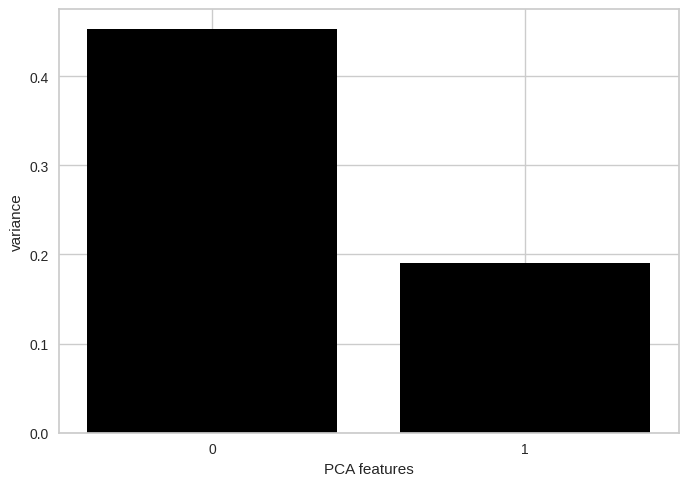

Total no. of components: 2
Total Variance: 64.25027304468477

------------------------------------------------------------------------



In [ ]:
X_train_pca_2, X_val_pca_2,X_test_pca_2= perform_pca_components("Standard Scaled",X_train_std,X_val_std,X_test_std,components=2)

**Observation**: 64.25% variance is explained by first two components

In [ ]:
#Display data after applying form:
print(f"Dataset after applying PCA (2 components): \n \n")
print(f"Training Dataset - PCA (2 components): \n {pd.DataFrame(X_train_pca_2).head(5)} \n \n", "---------------------------------------------------------------------------")
#Display Validation Dataset
print(f"Validation Dataset - PCA (2 components): \n {pd.DataFrame(X_val_pca_2).head(5)} \n \n", "---------------------------------------------------------------------------")
#Display Testing Dataset
print(f"Testing Dataset - PCA (2 components): \n {pd.DataFrame(X_test_pca_2).head(5)} \n \n", "---------------------------------------------------------------------------")

Dataset after applying PCA (2 components): 
 

Training Dataset - PCA (2 components): 
           0         1
0 -1.992151  0.016431
1  0.696829 -0.412651
2 -3.321119 -2.179515
3 -1.295260  0.136674
4 -1.530844  1.010951 
 
 ---------------------------------------------------------------------------
Validation Dataset - PCA (2 components): 
           0         1
0  1.953365  1.601664
1 -1.308356  0.917612
2  3.884313 -0.913424
3 -2.901716  0.758441
4 -1.791732  0.633321 
 
 ---------------------------------------------------------------------------
Testing Dataset - PCA (2 components): 
           0         1
0  1.208823  2.004808
1 -0.281132  1.540069
2  2.586050 -0.468704
3  3.730956  1.555604
4 -1.708610  1.839453 
 
 ---------------------------------------------------------------------------


# Comparison of Dimensionality Reduction Technique

### Use PCA to reduce dimensionality to only 2 dimensions. Plot 1000 random images from the training set in the 2D space spanned by the first two principal components. Use a scatterplot with 10 different colors to represent each image’s target class. Repeat the process and create the same type of plots for t-SNE, LLE and MDS. Which of the visualizations do you prefer and why? 

In [ ]:
colors = ['blue', 'green', 'red', 'cyan']
def visualize_data(X_modified,y_train):
  plt.figure(figsize=(8, 8))
  for i in range(4):
      idx = np.where(y_train == i)[0]
      idx_subset = random.sample(list(idx), 800)
      plt.scatter(X_modified[idx_subset, 0], X_modified[idx_subset, 1],color=colors[i], label=str(i), alpha=0.5)
  plt.legend()
  plt.show()

Cluster Visualisation (PCA):



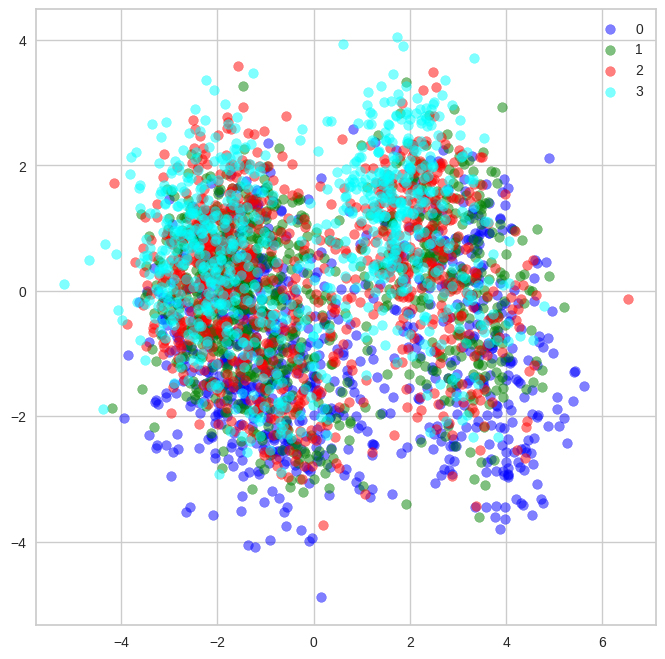

In [ ]:
print(f"Cluster Visualisation (PCA):\n")
visualize_data(X_train_pca_2, y_train_std)

Let's try the tsne, lle, mds techniques with dataset

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_train_std)
print('t-SNE KL divergence:', tsne.kl_divergence_)

t-SNE KL divergence: 2.2172904014587402


In [ ]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X_train_std)
print('LLE reconstruction error:', lle.reconstruction_error_)


LLE reconstruction error: 7.03502862037515e-09


In [ ]:
mds = MDS(n_components=2, n_init=1, max_iter=100)
X_mds = mds.fit_transform(X_train_std)
print('MDS stress:', mds.stress_)


MDS stress: 58942096.41287283


Cluster Visualisation (tsne):



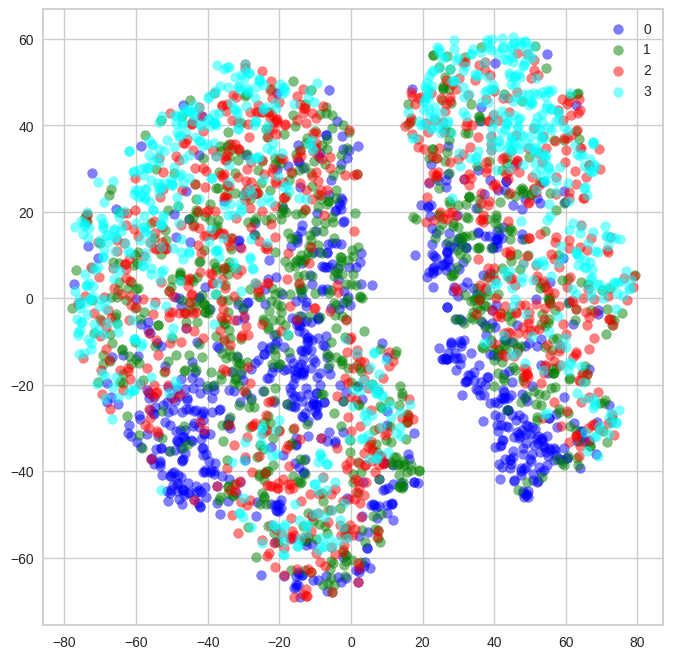

In [ ]:
print(f"Cluster Visualisation (tsne):\n")
visualize_data(X_tsne, y_train_std)

Cluster Visualisation (LLE):



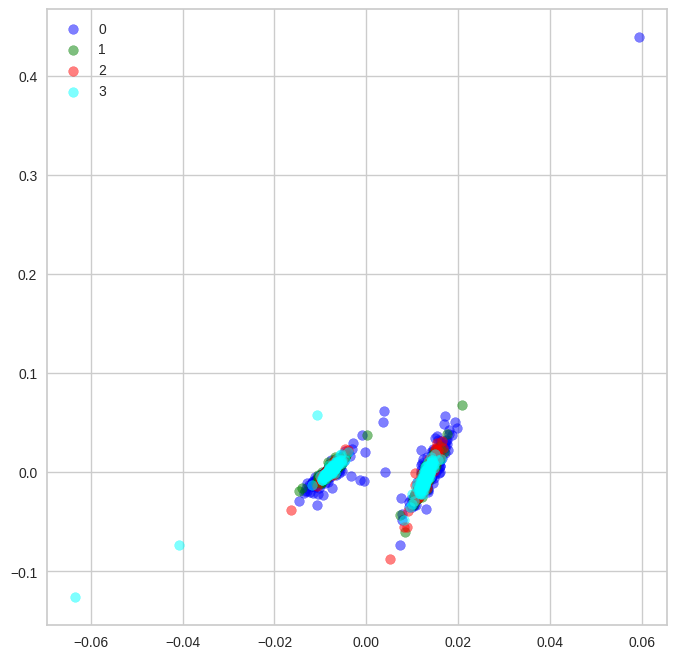

In [ ]:
print(f"Cluster Visualisation (LLE):\n")
visualize_data(X_lle, y_train_std)

Cluster Visualisation (MDS):



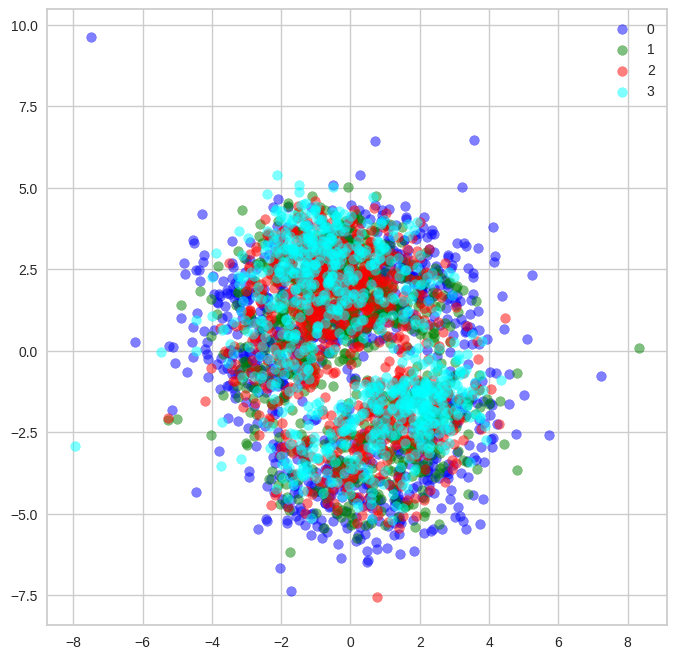

In [ ]:
print(f"Cluster Visualisation (MDS):\n")
visualize_data(X_mds, y_train_std)

T-sne suits this dataset because the data points are clustered properly as compared to other dimensionality techniques whereas in other dimensionality techniques data points are overlapping over one another.

# K-Means Clustering

### Take 10000 samples of the training portion of fashion MNIST dataset and cluster the images using K-Means. To speed up the algorithm, use PCA to reduce the dimensionality of the dataset. Ensure that you have a good number of clusters using one of the techniques we discussed in class. Visualize the clusters (you can show only a subset of images): do you see similar clothing items in each cluster?

In [37]:
X_std= StandardScaler().fit_transform(X)
X_std = pd.DataFrame(X_std)

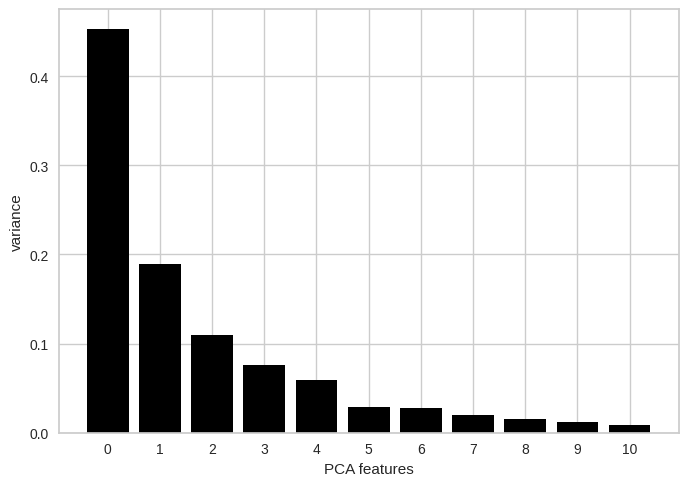

Estimated no. of components:  7


In [38]:
pca1=PCA()
pca1.fit_transform(X_std)
features = range(pca1.n_components_)
plt.bar(features,pca1.explained_variance_ratio_,color="black")
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.xticks(features)
plt.show()
cum_sum_eigenvalues1 = np.cumsum(pca1.explained_variance_ratio_)
print("Estimated no. of components: ", len(cum_sum_eigenvalues1[cum_sum_eigenvalues1<0.95]))

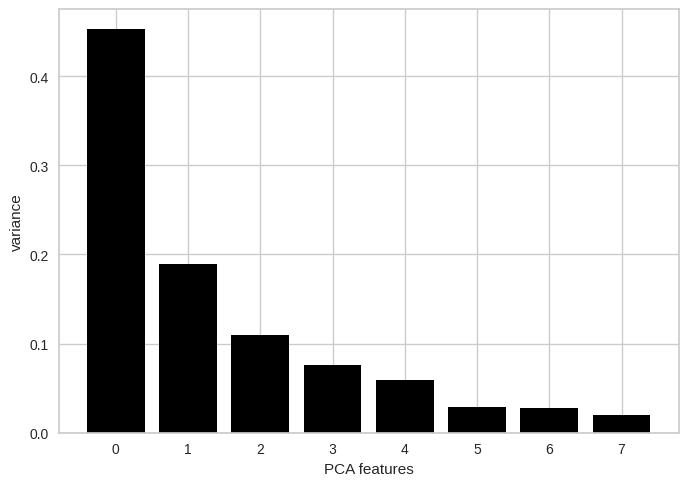

Total no. of components: 8
Total Variance: 96.32495876949773


In [39]:
pca1=PCA(n_components=8)
X_std_pca1=pca1.fit_transform(X_std)
features = range(pca1.n_components_)
plt.bar(features,pca1.explained_variance_ratio_,color="black")
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.xticks(features)
plt.show()

var_ratio=pca1.explained_variance_ratio_
print("Total no. of components:",8)
print("Total Variance:",sum(var_ratio)*100)

In [ ]:
# Determine the optimal number of clusters using the elbow method.
def optimal_Clusters_elbow(X_train):
  wcss = []
  for i in range(1, 11):
      kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
      kmeans.fit(X_train)
      wcss.append(kmeans.inertia_)
  plt.plot(range(1, 11), wcss)
  plt.title('Elbow Method')
  plt.xlabel('Number of Clusters')
  plt.ylabel('WCSS')
  plt.show()

In [ ]:
# Optimal number of clusters using silhouette analysis.
def optimal_Clusters_silhouette(X_train):
  sil_scores = []
  for n_clusters in range(2, 11):
      kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
      kmeans.fit(X_train)
      sil_scores.append(silhouette_score(X_train, kmeans.labels_))
  plt.plot(range(2, 11), sil_scores)
  plt.title('Silhouette Analysis')
  plt.xlabel('No. of clusters')
  plt.ylabel('Silhouette Score')
  plt.show()

In [ ]:
def optimal_Clusters_silhouetteDiag(X_train):
  fig, axes = plt.subplots(3, 2, figsize=(12, 16))

  for i, k in enumerate(range(2, 8)):
      row = i // 2
      col = i % 2
      
      model = KMeans(k, init='k-means++', n_init=100, random_state=42)
      visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axes[row, col])
      visualizer.fit(X_train)
      visualizer.finalize()
      axes[row, col].set_xlim([-0.1, 1])
      
  plt.tight_layout()

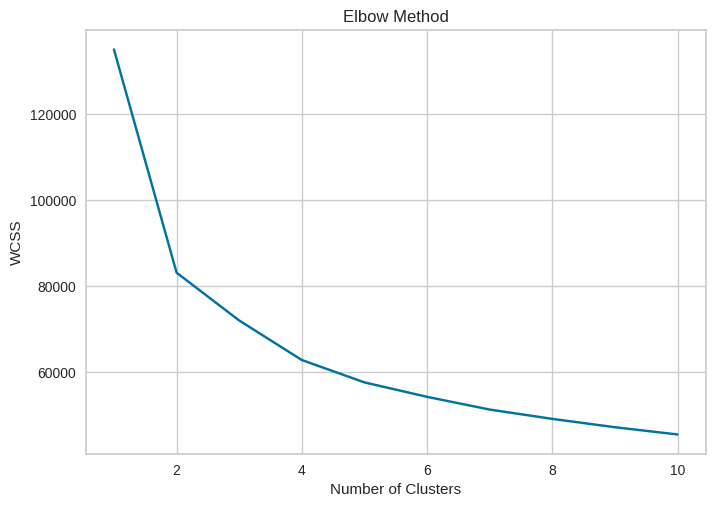

In [ ]:
optimal_Clusters_elbow(X_std_pca1)

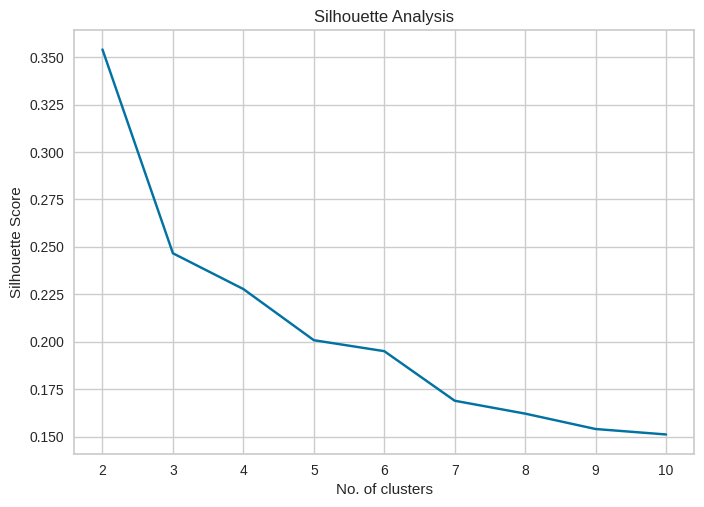

In [ ]:
optimal_Clusters_silhouette(X_std_pca1)

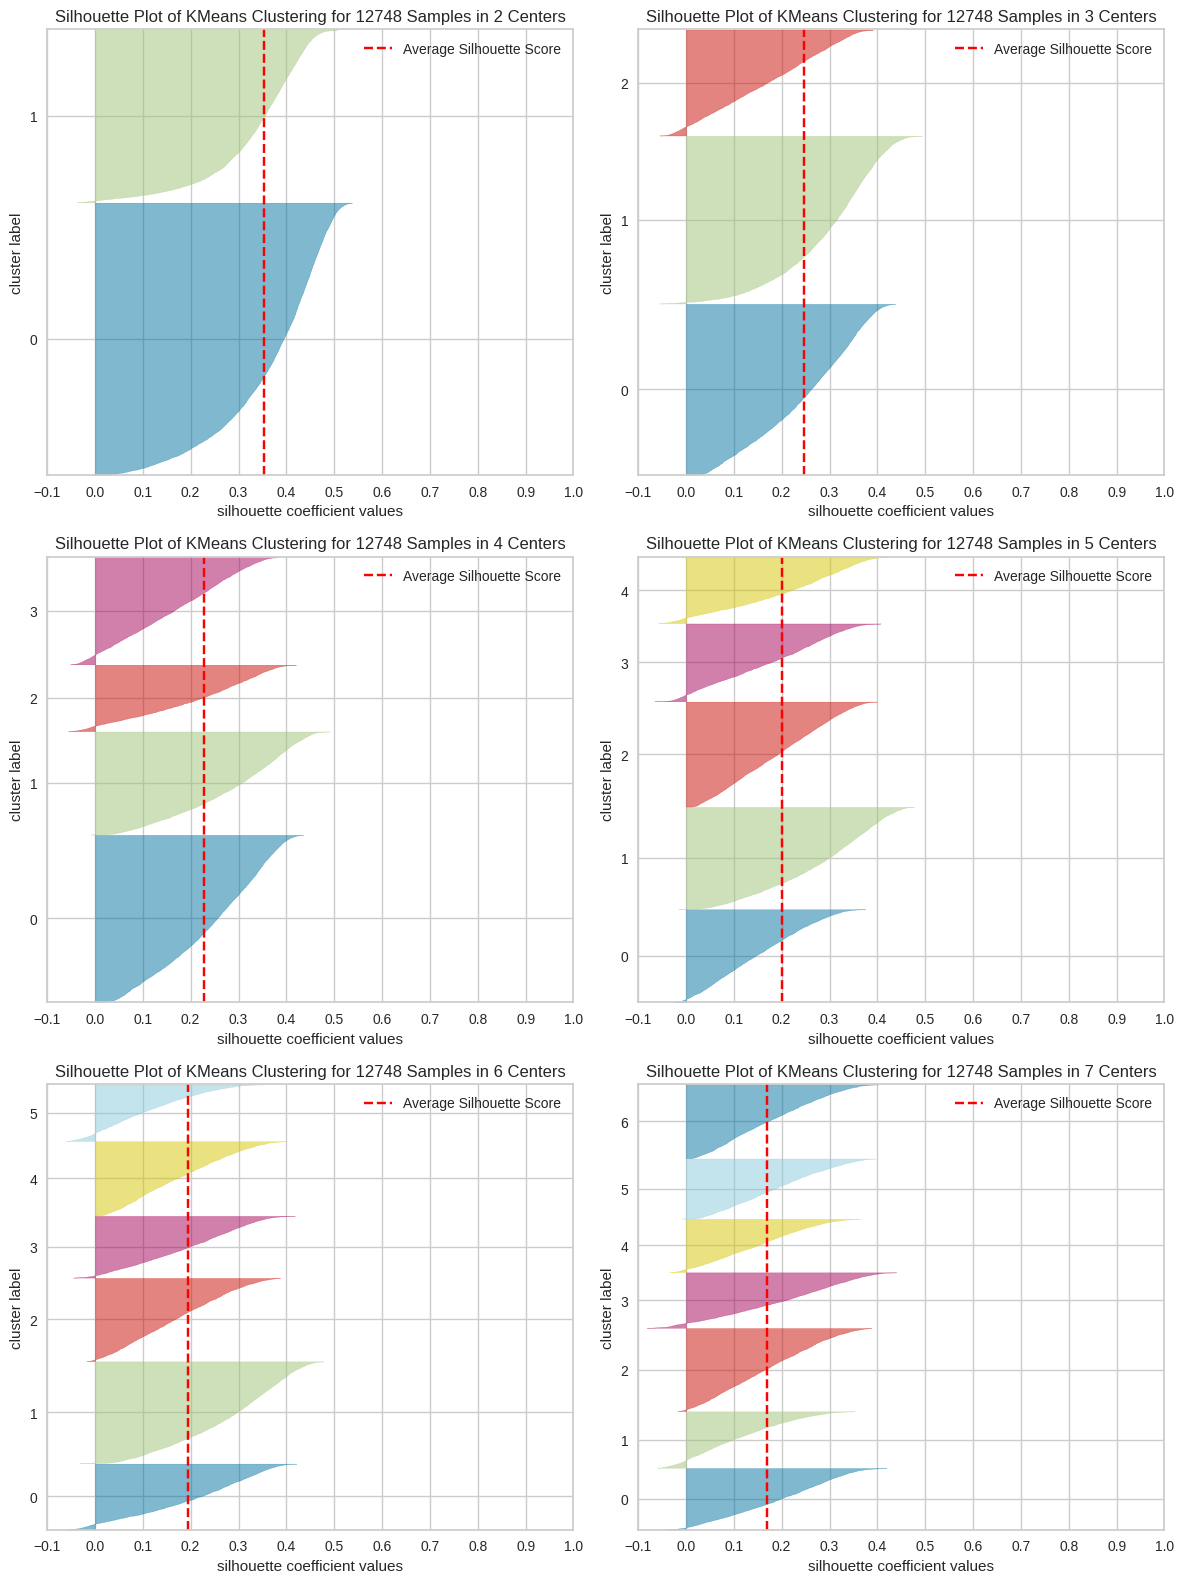

In [ ]:
optimal_Clusters_silhouetteDiag(X_std_pca1)

From the elbow method plot and silhouette analysis, we observe 3 clusters to be the optimal no. of clusters, and , from the silhouette diagramwe observe 3 to be optimal as the clusters look even.

In [ ]:
# Fit k-Means model with optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_std_pca1)

In [ ]:
len(labels)

12748

In [ ]:
X_std_kmeans = pd.DataFrame(X_std_pca1)
X_std_kmeans.head(8)


,0,1,2,3,4,5,6,7
0,-2.279247,0.588888,-0.317343,0.393232,0.443341,0.615811,0.453826,0.021207
1,-0.870647,1.418253,-0.462527,-0.547665,-1.176868,0.408461,0.255312,-0.379940
2,-2.131850,-1.457056,-0.418007,0.594845,-0.466644,-0.441919,-0.513646,0.648465
3,-1.848583,0.004562,-0.308674,-0.123796,-0.275989,0.422687,-0.889999,0.188735
4,-1.272034,1.512857,-0.600347,-0.451957,1.024782,-0.285621,-0.421533,-0.496266
5,2.422619,1.339631,0.249723,-0.376551,0.231491,-0.658393,-0.826073,0.047104
6,2.526655,-1.366990,1.902251,0.705387,-1.147957,0.047499,-0.916312,0.113775
7,-1.343551,-1.136532,0.495029,1.509513,0.518530,0.656618,0.403658,-0.512095


In [ ]:
X_std_kmeans = pd.DataFrame(X_std_pca1)
X_std_kmeans['clusters'] = labels
X_std_kmeans['class'] = y.values

In [ ]:
X_std_kmeans

,0,1,2,3,4,5,6,7,clusters,class
0,-2.279247,0.588888,-0.317343,0.393232,0.443341,0.615811,0.453826,0.021207,2,2
1,-0.870647,1.418253,-0.462527,-0.547665,-1.176868,0.408461,0.255312,-0.379940,2,0
2,-2.131850,-1.457056,-0.418007,0.594845,-0.466644,-0.441919,-0.513646,0.648465,0,2
3,-1.848583,0.004562,-0.308674,-0.123796,-0.275989,0.422687,-0.889999,0.188735,2,1
4,-1.272034,1.512857,-0.600347,-0.451957,1.024782,-0.285621,-0.421533,-0.496266,2,1
...,...,...,...,...,...,...,...,...,...,...
12743,-1.258722,0.483800,-0.243852,0.000233,-0.287755,-0.032433,-1.004397,0.035344,2,2
12744,-1.310667,0.515130,1.646939,-0.057526,-2.197587,-0.845676,-0.849957,0.954594,2,3
12745,-2.689687,-0.240335,0.421939,-0.248672,1.125629,0.148639,0.235567,-0.533634,2,0
12746,5.683617,-1.842390,1.952174,-0.284684,0.319467,0.749465,0.049432,-0.336680,1,3


In [ ]:
X_std_kmeans['clusters'].value_counts()


2    4901
1    4809
0    3038
Name: clusters, dtype: int64

In [ ]:
X_std_kmeans['class'].value_counts()

2    3349
0    3346
1    3346
3    2707
Name: class, dtype: int64

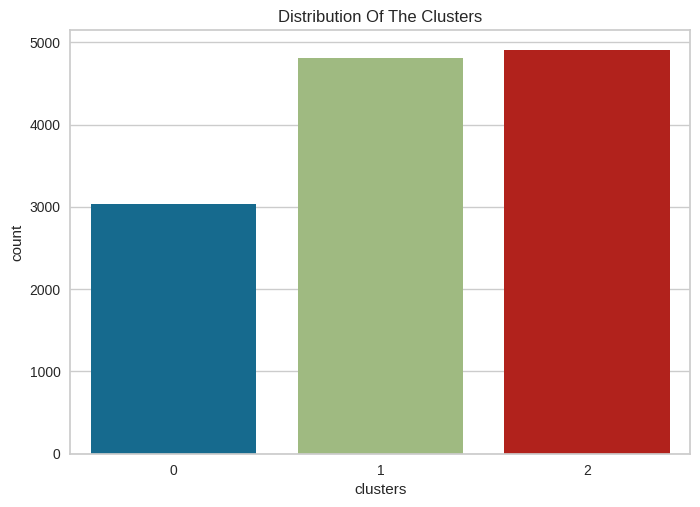

In [ ]:
# Plot countplot of clusters
ax = sns.countplot(data=X_std_kmeans, x='clusters')
ax.set_title('Distribution Of The Clusters')
plt.show()

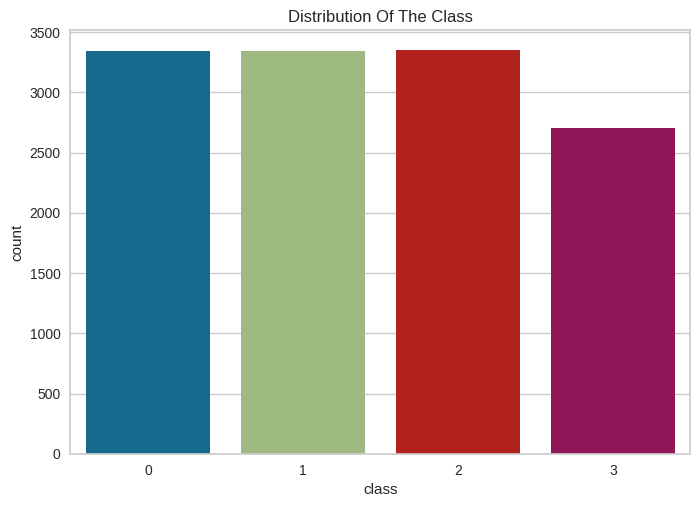

In [ ]:
# Plot countplot of clusters
ax = sns.countplot(data=X_std_kmeans, x='class')
ax.set_title('Distribution Of The Class')
plt.show()

In [ ]:
print(f"Cluster 0:\n{X_std_kmeans[X_std_kmeans['clusters']==0]['class'].value_counts()}","\n")
print(f"Cluster 1:\n{X_std_kmeans[X_std_kmeans['clusters']==1]['class'].value_counts()}","\n")
print(f"Cluster 2:\n{X_std_kmeans[X_std_kmeans['clusters']==2]['class'].value_counts()}","\n")

Cluster 0:
3    1087
2     833
1     729
0     389
Name: class, dtype: int64 

Cluster 1:
0    1471
1    1175
2    1121
3    1042
Name: class, dtype: int64 

Cluster 2:
0    1486
1    1442
2    1395
3     578
Name: class, dtype: int64 



Since this is not an image dataset, havent done image visualization. But have plotted the count of all classes in each cluster.

We observe that, on checking the count of original class in the above 3 clusters, kmeans is not performing well. This is due to the clusters defined by kmeans clustering having complex shapes or non-linear boundaries making k-means clustering less effective.

# Gaussian mixture model

### Take 10000 samples of the training portion of fashion MNIST dataset and cluster the images using a Gaussian mixture model. To speed up the algorithm, use PCA to reduce the dimensionality of the dataset. Ensure that you have a good number of clusters using one of the techniques we discussed in the class.

In [40]:
param_grid = {
    "n_components": range(1, 12),
}
def gmm_bic_score(estimator, X):
    return -estimator.bic(X)
grid = GridSearchCV(
    GaussianMixture(random_state=4), param_grid=param_grid, scoring=gmm_bic_score)
grid.fit(X_std_pca1)
dataframe = pd.DataFrame(grid.cv_results_)[
    ["param_n_components", "mean_test_score"]
]
dataframe["mean_test_score"] = -dataframe["mean_test_score"]
dataframe = dataframe.rename(
    columns={
        "param_n_components": "Number of components",
        "mean_test_score": "BIC score",
    }
)
dataframe.sort_values(by="BIC score").head(11)

,Number of components,BIC score
3,4,49871.244502
4,5,50039.358126
2,3,50250.112454
5,6,50325.721721
6,7,50582.300520
1,2,50660.774344
7,8,50860.781530
8,9,51194.501155
9,10,51480.082945
10,11,51817.086491


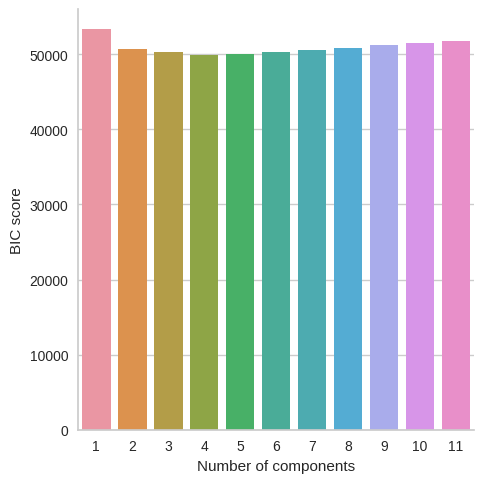

In [41]:
sns.catplot(
    data=dataframe,
    kind="bar",
    x="Number of components",
    y="BIC score",
)
plt.show()

There are two methods to choose optimal number of clusters. We chose BIC as BIC is considered to be a more robust criterion for model selection than AIC, especially when the sample size or number of parameters is large. 

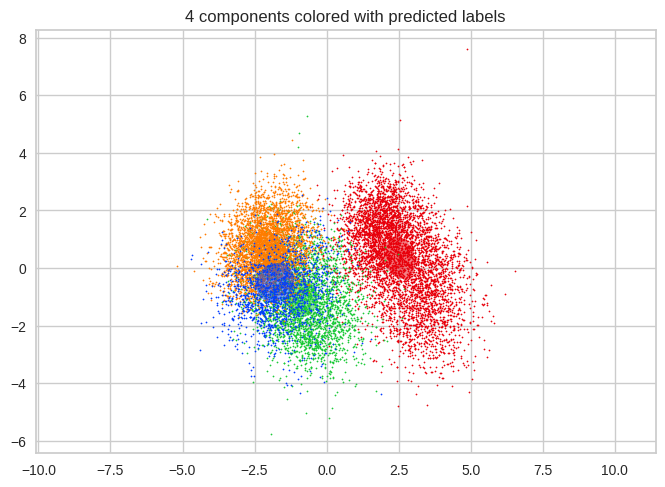

In [42]:
color_iter = sns.color_palette("bright", grid.best_params_['n_components'])[::-1]
Y_ = grid.best_estimator_.predict(X_std_pca1)
fig, ax = plt.subplots()
for i, (mean, cov, color) in enumerate(
    zip(
        grid.best_estimator_.means_,
        grid.best_estimator_.covariances_,
        color_iter,
    )
):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X_std_pca1[Y_ == i, 0], X_std_pca1[Y_ == i, 1], 0.8, color=color)

    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ellipse = Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
    ellipse.set_clip_box(fig.bbox)
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

plt.title(
    f"{grid.best_params_['n_components']} components colored with predicted labels"
)
plt.axis("equal")
plt.show()

Optimal number of components came out to be 4 as the BIC score is best at it. The point at which the BIC score stops decreasing and starts increasing is usually the best as it penalizes the complexity and takes the goodness of the model very well which happens at 3 in our case.

Thus, Gaussian mixture model performs better on this 'Body performance' dataset since it is normally distributed and is non linear and we can clearly see classes clustered together.

### Visualize the clusters (you can show only a subset of images): do you see similar clothing items in each cluster?

In [43]:
best_estimator = grid.best_estimator_
y_pred = best_estimator.predict(X_std_pca1)
num_clusters = best_estimator.get_params()['n_components']

In [44]:
X_std_Gaussian = pd.DataFrame(X_std_pca1)
X_std_Gaussian['n components']=y_pred
X_std_Gaussian['class'] = y.values
X_std_Gaussian.head(8)


,0,1,2,3,4,5,6,7,n components,class
0,-2.279247,0.588888,-0.317343,0.393232,0.443341,0.615811,0.453826,0.021207,2,1
1,-0.870647,1.418253,-0.462527,-0.547665,-1.176868,0.408461,0.255312,-0.379940,2,3
2,-2.131850,-1.457056,-0.418007,0.594845,-0.466644,-0.441919,-0.513646,0.648465,3,1
3,-1.848583,0.004562,-0.308674,-0.123796,-0.275989,0.422687,-0.889999,0.188735,2,2
4,-1.272034,1.512857,-0.600347,-0.451957,1.024782,-0.285621,-0.421533,-0.496266,2,2
5,2.422619,1.339631,0.249723,-0.376551,0.231491,-0.658393,-0.826073,0.047104,0,2
6,2.526655,-1.366990,1.902251,0.705387,-1.147957,0.047499,-0.916312,0.113775,0,0
7,-1.343551,-1.136532,0.495029,1.509513,0.518530,0.656618,0.403658,-0.512095,3,2


In [45]:
for e in range(num_clusters):
  print(f"Cluster {e}:\n{X_std_Gaussian[X_std_Gaussian['n components']==e]['class'].value_counts()}","\n")

Cluster 0:
3    1485
2    1183
1    1114
0    1046
Name: class, dtype: int64 

Cluster 1:
2    900
1    832
3    681
0    559
Name: class, dtype: int64 

Cluster 2:
1    1123
3    1094
2    1076
0     305
Name: class, dtype: int64 

Cluster 3:
0    797
1    280
2    187
3     86
Name: class, dtype: int64 



Since this is not an image dataset, havent done image visualization. But have plotted the count of all classes in each cluster.

From the above analysis, we observe that the count of original classes in each cluster is almost the same but since gaussian mixture model is an unsupervised learning model, so it is labelling the points to different clusters by finding underlying relationships betweenm different features. Features like, height, weight, age, etc. can give important information about an individual's body performance, and hence those points are clustered together in one group. Thus Gausian mixture model is clustering well on this dataset, but not according to the actual labels. 

### Use the model to generate 20 new clothing items (using the sample() method), and visualize them (since you used PCA, you will need to use its inverse_transform() method).

In [47]:
X_new,y_new = grid.best_estimator_.sample(n_samples=20)
X_original_20 = pca1.inverse_transform(X_new)

In [48]:
X_Gaussian_new = pd.DataFrame(X_original_20)
X_Gaussian_new['n components']=y_new
X_Gaussian_new.head(20)

,0,1,2,3,4,5,6,7,8,9,10,n components
0,-0.436221,1.213080,-1.040689,-1.718880,-0.491113,0.146491,0.021588,-0.933214,1.978276,0.296633,-0.197080,0
1,0.003038,1.073094,-0.952848,-0.676988,0.942530,0.504353,-0.319201,-0.867544,0.730966,-0.686543,-0.766236,0
2,-0.313604,1.606092,-1.579959,-1.081619,1.190247,-3.697961,-1.698803,-1.493470,0.231626,0.089711,-1.246812,0
3,1.947955,1.083762,-1.019780,-0.794144,0.805185,1.990205,0.524358,-0.965695,1.512440,-1.021402,-1.389770,0
4,-0.031906,1.336980,-1.850559,-1.590419,0.771219,-1.456150,-2.230593,-1.061115,0.935329,-1.298540,-0.713031,0
5,-0.219721,1.020545,0.087861,-1.234203,-0.827454,-0.501813,-1.705442,-0.947602,1.190217,0.050934,-0.527846,0
6,-0.574342,1.443319,-1.106061,-1.389099,0.482061,0.870739,0.044185,-1.321212,0.947433,-0.136061,-0.757380,0
7,0.599658,0.677692,-0.306754,0.054840,1.116841,-0.177194,0.250344,-0.864152,-0.623478,-0.867918,-1.230331,0
8,-1.936461,1.126763,0.023877,-0.507434,-0.316187,-1.350710,-1.093838,-0.417639,2.261805,2.253649,0.399281,0
9,0.616997,1.012638,-0.976826,-0.376343,1.423034,-0.359302,-1.881242,-0.817481,0.275160,-1.497255,-1.124826,0


Since this is not an image dataset, havent done image visualization.

But we can see the sample data created from Gaussian which is similar to the Standard scaled training data. The data is correctly generated. 

# Feedforward Neural Network

### Build a fully connected (dense) feedforward neural network with two hidden layers using Keras (within Tensorflow) and train it on 50k Fashion MNIST training images. First hidden layer should contain 200 neurons and second hidden layer should contain 50 neurons. The hidden layers should have ReLU activation function. Train the network for 100 epochs. Plot training and validation loss and accuracy as a function of training epochs. Try three different learning rates of your choice (make the plots for each learning rate). 

In [ ]:
scores = []
def display(col=['Model','Kind','training acc','validation acc','test acc', 'time taken']):
    table = pd.DataFrame(scores,columns=col)
    return table

def train(activation='relu',rate=0.015):
    tf.random.set_seed(42)
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(200, activation=activation),
        keras.layers.Dense(50, activation=activation),
        keras.layers.Dense(4, activation='softmax')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=rate)
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val,y_val))
    return model,history

def evaluate_nw(model):
    return model.evaluate(X_test ,y_test)

def plot_epoch(history):
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    axes[0].plot(history.history['loss'], label='Training Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    axes[1].plot(history.history['accuracy'], label='Training Accuracy')
    axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    plt.show()

Epoch 1/100
299/299 [==============================] - 3s 3ms/step - loss: 1.6218 - accuracy: 0.4331 - val_loss: 1.0872 - val_accuracy: 0.5154
Epoch 2/100
299/299 [==============================] - 1s 2ms/step - loss: 1.0136 - accuracy: 0.5380 - val_loss: 0.9814 - val_accuracy: 0.5447
Epoch 3/100
299/299 [==============================] - 1s 2ms/step - loss: 0.9620 - accuracy: 0.5651 - val_loss: 0.9375 - val_accuracy: 0.5729
Epoch 4/100
299/299 [==============================] - 1s 2ms/step - loss: 0.9281 - accuracy: 0.5794 - val_loss: 0.9774 - val_accuracy: 0.5510
Epoch 5/100
299/299 [==============================] - 1s 2ms/step - loss: 0.9226 - accuracy: 0.5809 - val_loss: 0.9237 - val_accuracy: 0.5870
Epoch 6/100
299/299 [==============================] - 1s 3ms/step - loss: 0.9102 - accuracy: 0.5862 - val_loss: 0.9177 - val_accuracy: 0.5771
Epoch 7/100
299/299 [==============================] - 1s 3ms/step - loss: 0.9013 - accuracy: 0.5938 - val_loss: 0.8976 - val_accuracy: 0.6006

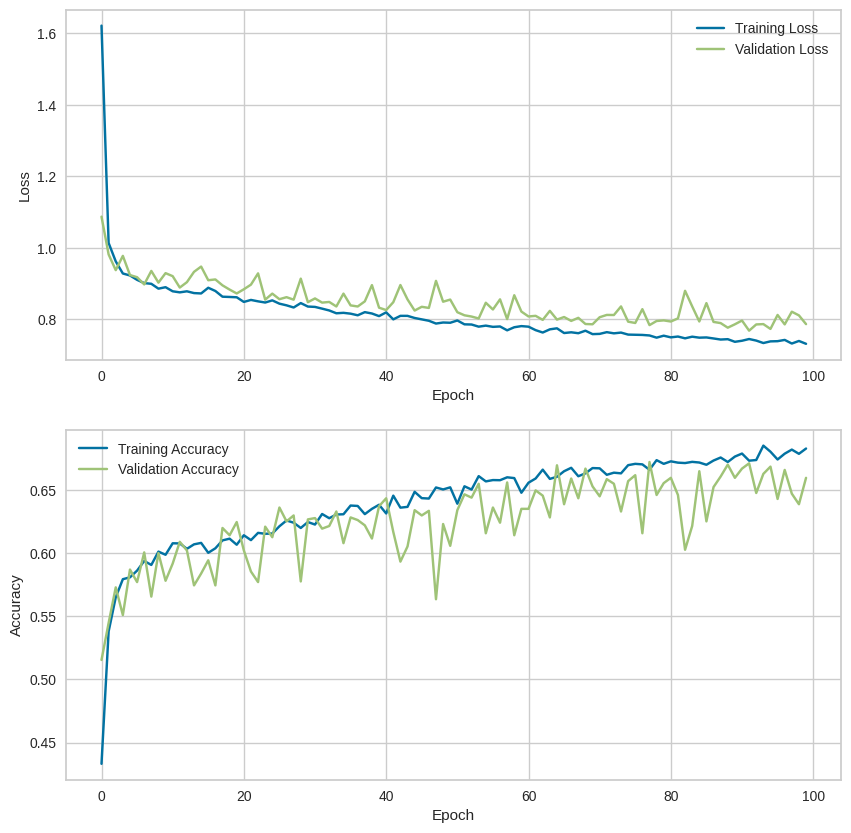

Epoch 1/100
299/299 [==============================] - 2s 4ms/step - loss: 2.1428 - accuracy: 0.4674 - val_loss: 1.2121 - val_accuracy: 0.5227
Epoch 2/100
299/299 [==============================] - 1s 3ms/step - loss: 1.0219 - accuracy: 0.5469 - val_loss: 0.9496 - val_accuracy: 0.5452
Epoch 3/100
299/299 [==============================] - 1s 3ms/step - loss: 0.9557 - accuracy: 0.5634 - val_loss: 0.9038 - val_accuracy: 0.5964
Epoch 4/100
299/299 [==============================] - 1s 3ms/step - loss: 0.9174 - accuracy: 0.5843 - val_loss: 0.8829 - val_accuracy: 0.6079
Epoch 5/100
299/299 [==============================] - 1s 4ms/step - loss: 0.9026 - accuracy: 0.5925 - val_loss: 0.9825 - val_accuracy: 0.5358
Epoch 6/100
299/299 [==============================] - 1s 4ms/step - loss: 0.9021 - accuracy: 0.5949 - val_loss: 0.8757 - val_accuracy: 0.5996
Epoch 7/100
299/299 [==============================] - 1s 3ms/step - loss: 0.8745 - accuracy: 0.6055 - val_loss: 0.8408 - val_accuracy: 0.6289

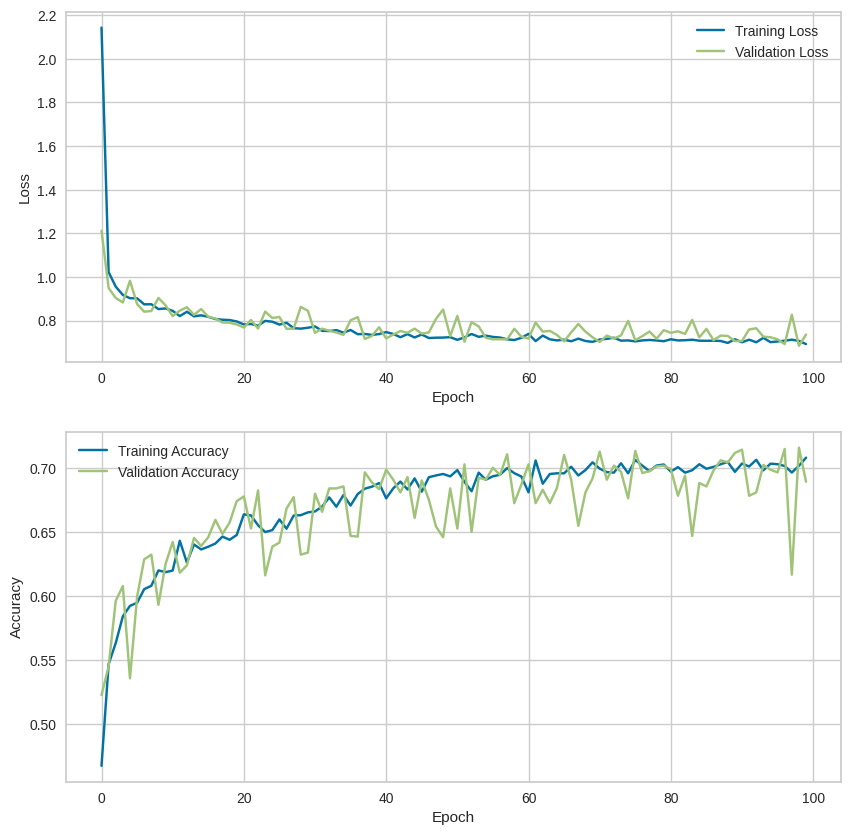

Epoch 1/100
299/299 [==============================] - 2s 4ms/step - loss: 1.7368 - accuracy: 0.4980 - val_loss: 0.9122 - val_accuracy: 0.5964
Epoch 2/100
299/299 [==============================] - 1s 4ms/step - loss: 0.9457 - accuracy: 0.5651 - val_loss: 0.9708 - val_accuracy: 0.5353
Epoch 3/100
299/299 [==============================] - 1s 3ms/step - loss: 0.9384 - accuracy: 0.5705 - val_loss: 0.9428 - val_accuracy: 0.5970
Epoch 4/100
299/299 [==============================] - 1s 5ms/step - loss: 0.9109 - accuracy: 0.5888 - val_loss: 0.8865 - val_accuracy: 0.5964
Epoch 5/100
299/299 [==============================] - 2s 5ms/step - loss: 0.9184 - accuracy: 0.5833 - val_loss: 1.4239 - val_accuracy: 0.3921
Epoch 6/100
299/299 [==============================] - 1s 3ms/step - loss: 0.9218 - accuracy: 0.5860 - val_loss: 0.8893 - val_accuracy: 0.6043
Epoch 7/100
299/299 [==============================] - 1s 3ms/step - loss: 0.9068 - accuracy: 0.5898 - val_loss: 0.8848 - val_accuracy: 0.6132

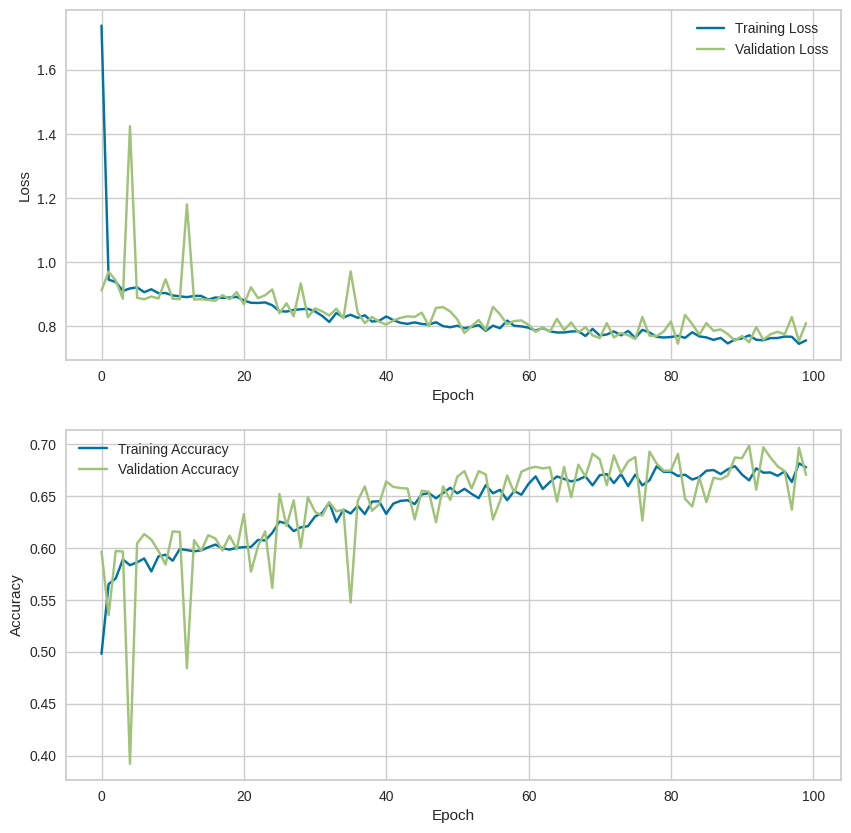

In [ ]:
scores = []
rates = [0.0001,0.005,0.01]
for r in rates:
    model,history = train(activation='relu',rate=r)
    scores.append([r,history.history['val_loss'][-1], history.history['val_accuracy'][-1]])
    plot_epoch(history)

### Run the network on the test portion of the dataset using best-performing learning rate and report loss and accuracy.

In [ ]:
display(col=["learning rate","validation loss","validation accuracy"])

,learning rate,validation loss,validation accuracy
0,0.0001,0.786387,0.659697
1,0.0050,0.735936,0.689493
2,0.0100,0.810761,0.670152


Most optimal learning rate is 0.005 since increasing or decreasing this rate leads to lesser accuracy as the model starts to diverge and overshoot or does not converge

In [ ]:
model, history=train(rate=0.005)
evaluate_nw(model)

Epoch 1/100
299/299 [==============================] - 2s 4ms/step - loss: 1.9494 - accuracy: 0.4649 - val_loss: 0.9281 - val_accuracy: 0.5829
Epoch 2/100
299/299 [==============================] - 1s 2ms/step - loss: 1.0290 - accuracy: 0.5353 - val_loss: 1.0432 - val_accuracy: 0.5238
Epoch 3/100
299/299 [==============================] - 1s 3ms/step - loss: 0.9518 - accuracy: 0.5662 - val_loss: 0.8963 - val_accuracy: 0.6121
Epoch 4/100
299/299 [==============================] - 1s 2ms/step - loss: 0.9103 - accuracy: 0.5914 - val_loss: 0.8917 - val_accuracy: 0.6085
Epoch 5/100
299/299 [==============================] - 1s 3ms/step - loss: 0.9032 - accuracy: 0.5924 - val_loss: 0.9125 - val_accuracy: 0.5860
Epoch 6/100
299/299 [==============================] - 1s 3ms/step - loss: 0.8992 - accuracy: 0.5926 - val_loss: 0.8903 - val_accuracy: 0.5975
Epoch 7/100
299/299 [==============================] - 1s 3ms/step - loss: 0.8894 - accuracy: 0.5955 - val_loss: 0.8689 - val_accuracy: 0.6262

[0.6868530511856079, 0.7006269693374634]

Model performs well with an accuracy of 70 percent on the test data and loss of 0.68. The model is also able to converge given the learning rate. Also, with more training data, the model can train better and give better accuracy.

Further we will use linear activation and compare the test outputs.

### How many parameters does the network have? How many of those parameters are bias parameters?

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 11)                0         
                                                                 
 dense_27 (Dense)            (None, 200)               2400      
                                                                 
 dense_28 (Dense)            (None, 50)                10050     
                                                                 
 dense_29 (Dense)            (None, 4)                 204       
                                                                 
Total params: 12,654
Trainable params: 12,654
Non-trainable params: 0
_________________________________________________________________


The model has total of 12654 params out of which the bias parameters are the total of bias parameter in each layer i.e 200+50+4 = 254

### Repeat everything from the previous step but make the hidden layers have linear activation functions.

Epoch 1/100
299/299 [==============================] - 2s 3ms/step - loss: 100.7104 - accuracy: 0.4712 - val_loss: 1.4792 - val_accuracy: 0.4548
Epoch 2/100
299/299 [==============================] - 1s 2ms/step - loss: 1.1429 - accuracy: 0.5444 - val_loss: 1.1890 - val_accuracy: 0.4428
Epoch 3/100
299/299 [==============================] - 1s 2ms/step - loss: 0.9685 - accuracy: 0.5706 - val_loss: 0.9393 - val_accuracy: 0.5808
Epoch 4/100
299/299 [==============================] - 1s 2ms/step - loss: 0.9411 - accuracy: 0.5762 - val_loss: 0.9752 - val_accuracy: 0.5865
Epoch 5/100
299/299 [==============================] - 1s 2ms/step - loss: 0.9513 - accuracy: 0.5720 - val_loss: 0.9324 - val_accuracy: 0.5666
Epoch 6/100
299/299 [==============================] - 1s 3ms/step - loss: 0.9442 - accuracy: 0.5742 - val_loss: 0.9264 - val_accuracy: 0.5761
Epoch 7/100
299/299 [==============================] - 1s 3ms/step - loss: 1.0562 - accuracy: 0.5540 - val_loss: 1.5539 - val_accuracy: 0.44

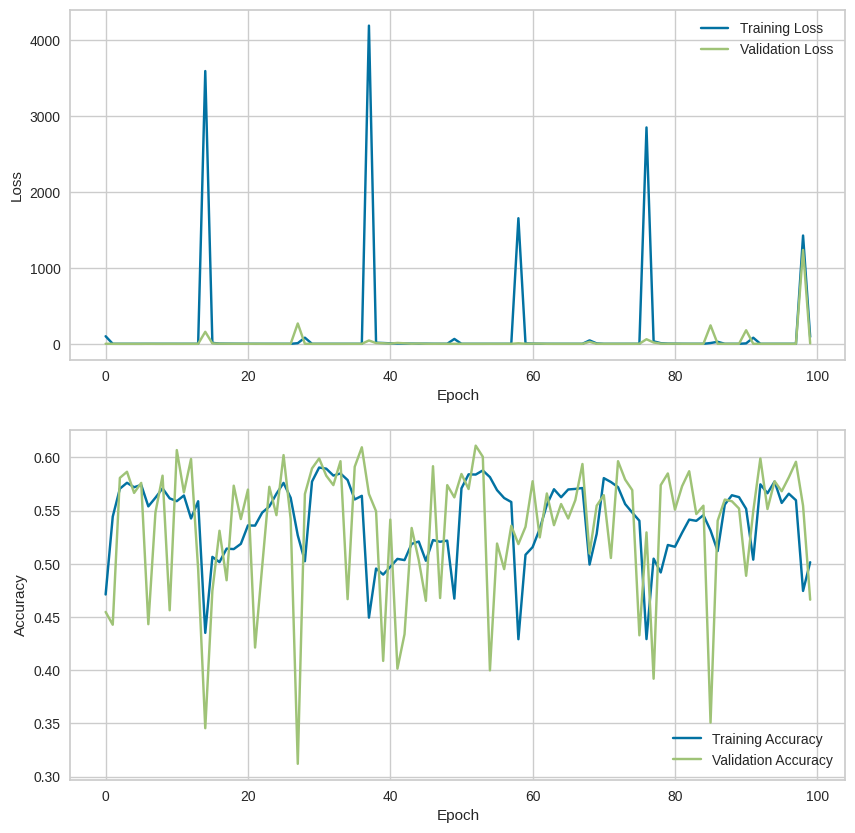

Epoch 1/100
299/299 [==============================] - 2s 4ms/step - loss: 12.0066 - accuracy: 0.5021 - val_loss: 1.3693 - val_accuracy: 0.4438
Epoch 2/100
299/299 [==============================] - 1s 3ms/step - loss: 1.1139 - accuracy: 0.5377 - val_loss: 1.0312 - val_accuracy: 0.5301
Epoch 3/100
299/299 [==============================] - 1s 3ms/step - loss: 1.0108 - accuracy: 0.5479 - val_loss: 0.9790 - val_accuracy: 0.6064
Epoch 4/100
299/299 [==============================] - 1s 5ms/step - loss: 0.9971 - accuracy: 0.5523 - val_loss: 0.9746 - val_accuracy: 0.5923
Epoch 5/100
299/299 [==============================] - 1s 4ms/step - loss: 0.9755 - accuracy: 0.5629 - val_loss: 1.1733 - val_accuracy: 0.4292
Epoch 6/100
299/299 [==============================] - 1s 3ms/step - loss: 0.9388 - accuracy: 0.5765 - val_loss: 0.9296 - val_accuracy: 0.5797
Epoch 7/100
299/299 [==============================] - 1s 2ms/step - loss: 0.9392 - accuracy: 0.5740 - val_loss: 0.9389 - val_accuracy: 0.609

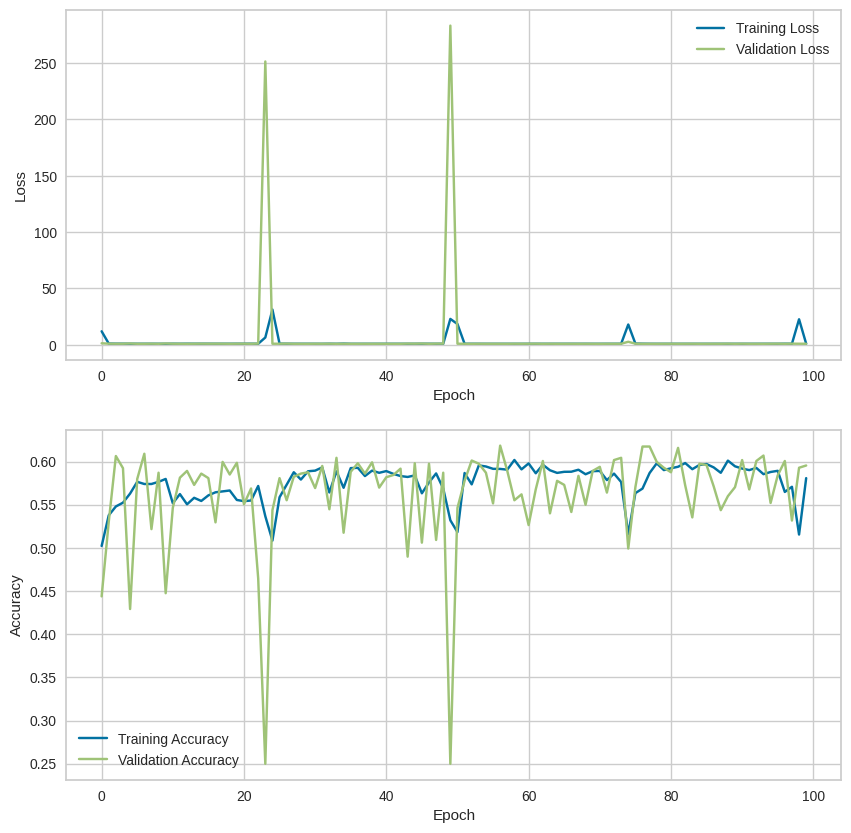

Epoch 1/100
299/299 [==============================] - 2s 4ms/step - loss: 5.6257 - accuracy: 0.4604 - val_loss: 1.5266 - val_accuracy: 0.5353
Epoch 2/100
299/299 [==============================] - 1s 2ms/step - loss: 2.2471 - accuracy: 0.4916 - val_loss: 1.6551 - val_accuracy: 0.5369
Epoch 3/100
299/299 [==============================] - 1s 2ms/step - loss: 1.8386 - accuracy: 0.5104 - val_loss: 1.3947 - val_accuracy: 0.5306
Epoch 4/100
299/299 [==============================] - 1s 2ms/step - loss: 1.7066 - accuracy: 0.5025 - val_loss: 1.3977 - val_accuracy: 0.5107
Epoch 5/100
299/299 [==============================] - 1s 3ms/step - loss: 1.3277 - accuracy: 0.5285 - val_loss: 2.4585 - val_accuracy: 0.3973
Epoch 6/100
299/299 [==============================] - 1s 3ms/step - loss: 1.1976 - accuracy: 0.5363 - val_loss: 1.1331 - val_accuracy: 0.5599
Epoch 7/100
299/299 [==============================] - 1s 3ms/step - loss: 1.1417 - accuracy: 0.5404 - val_loss: 0.9687 - val_accuracy: 0.5985

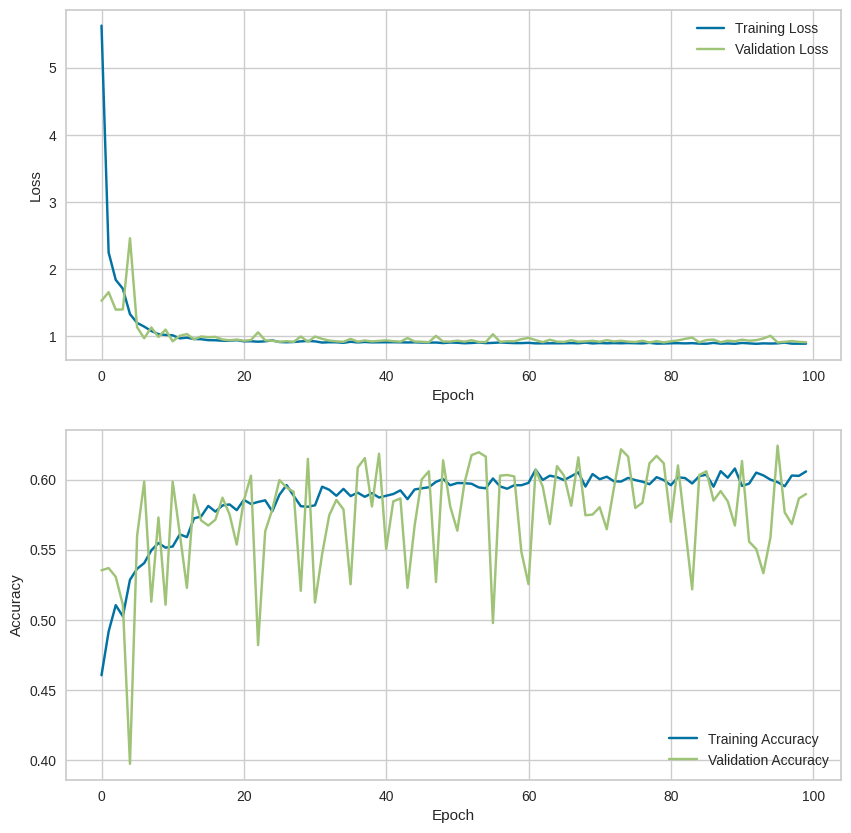

In [ ]:
scores = []
rates = [0.05,0.01,0.002]
for r in rates:
    model,history = train(activation=None,rate=r)
    scores.append([r,history.history['val_loss'][-1], history.history['val_accuracy'][-1]])
    plot_epoch(history)

In [ ]:
display(col=["learning rate","validation loss","validation accuracy"])

,learning rate,validation loss,validation accuracy
0,0.050,6.678241,0.466283
1,0.010,0.942856,0.595400
2,0.002,0.909769,0.589650


Best learning rate is again the one that isnt too big that it overshoots neither too small that it does not converge. Therefore we get better accuracy at leraning rate of 0.01. We will go ahead with this to perform predictions on our test data.

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 11)                0         
                                                                 
 dense_36 (Dense)            (None, 200)               2400      
                                                                 
 dense_37 (Dense)            (None, 50)                10050     
                                                                 
 dense_38 (Dense)            (None, 4)                 204       
                                                                 
Total params: 12,654
Trainable params: 12,654
Non-trainable params: 0
_________________________________________________________________


Number of parameters are the same as previous one i.e. total paramaters are equal to 12654 and bias parameters equal to 254. This is because the layers havent changed.

In [ ]:
model, history=train(activation=None,rate=0.01)
evaluate_nw(model)

Epoch 1/100
299/299 [==============================] - 2s 3ms/step - loss: 10.8423 - accuracy: 0.5078 - val_loss: 1.1873 - val_accuracy: 0.5337
Epoch 2/100
299/299 [==============================] - 1s 2ms/step - loss: 1.1231 - accuracy: 0.5313 - val_loss: 1.0644 - val_accuracy: 0.5274
Epoch 3/100
299/299 [==============================] - 1s 2ms/step - loss: 1.0137 - accuracy: 0.5540 - val_loss: 0.9724 - val_accuracy: 0.5761
Epoch 4/100
299/299 [==============================] - 1s 2ms/step - loss: 0.9665 - accuracy: 0.5655 - val_loss: 0.9918 - val_accuracy: 0.5682
Epoch 5/100
299/299 [==============================] - 1s 3ms/step - loss: 0.9646 - accuracy: 0.5674 - val_loss: 1.0887 - val_accuracy: 0.4595
Epoch 6/100
299/299 [==============================] - 1s 4ms/step - loss: 0.9323 - accuracy: 0.5774 - val_loss: 0.9582 - val_accuracy: 0.5410
Epoch 7/100
299/299 [==============================] - 2s 8ms/step - loss: 0.9349 - accuracy: 0.5738 - val_loss: 0.9278 - val_accuracy: 0.595

[0.8900759220123291, 0.5898641347885132]

Number of parameters are the same as previous one. Since the layers havent changed.

The loss and accuracy comes around 89% and 0.58 respectively almost similar to training and validatin accuracy. And model doesnt perform well overall as well as compared to feedforward neural network with ReLu activation function. 

### Discuss how this impacts accuracy and why.

Overall the accuracy decreases with linear activation because relu combats the problem of handling non linear relationships in the data. Relu does so by assigning 0 to weights that are negative and this introduces non linearity. With ReLu activation function we get overall testing accuracy of around 70% whereas with linear activation function, we get accuracy od 58% which is quite less. With more training data, testing accuracy can be further increased in case of feedforward neural network with ReLu activation function.

# Conclusion

Overall, we perform dimensionality reduction, clustering and classification on the dataset in this assignment and following are the things we conclude


*   PCA helps in removing redundancy but leads to by loss of some data.
Random forest without PCA takes more time to execute then Random Forest with PCA. But accuracy is greater in case of Random forest without PCA which is around 72%. 
*   Among various 2D visualizations, t-sne works really well.
*   In case of Kmeans clustering with optimal clusters=3, it didn't perform well due to non linear data. 
*   With 4 components, Gaussian distribution was able to cluster data points together but since gaussian mixture model is an unsupervised learning model, so it is labelling the points to different clusters by finding underlying relationships betweenm different features. Features like, height, weight, age, etc. can give important information about an individual's body performance, and hence those points are clustered together in one group. Thus Gausian mixture model is clustering well on this dataset, but not according to the actual labels. 
*   Feed forward networks will require more training data to give better accuracy than 70% with optimal hypertuning and relu activation function.



